In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import os
import matplotlib.backends 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
refs        ='/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/Tcga_R/GDCdata/TCGA-BRCA/harmonized/Transcriptome_Profiling/Gene_Expression_Quantification/r_data/reference/Homo_sapiens.GRCh38.97.chr.txt'
ref         = pd.read_csv(refs, sep="\t", header=0,skipinitialspace=True)
lncRNAs_ref = ref.query('biotype == "lncRNA"')
lncRNAs_ref.rename(columns={'gene_sym':'Gene'},inplace =True)

/home/alva/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
exp    = "/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/lncRNAs_acrossatleast9cancer"
de_lncRNAs_pancancer = pd.read_csv(exp, sep="\t", header=0,skipinitialspace=True)
de_lncRNAs_pancancer.rename(columns={'external_gene_name':'Gene','filename':'sample'},inplace=True)
de_lncRNAs_pancancer['sample'] = de_lncRNAs_pancancer['sample'].apply(lambda x:x.split('-')[1])

In [6]:
promoter    = "/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/lncRNAs_TCGA/promotercgprobes_lncRNAs"
promoter_lncRNAs = pd.read_csv(promoter, sep="\t", header=0,skipinitialspace=True)
promoter_lncRNAs.rename(columns={'probes':'Meth_Probe'},inplace=True)
#promoter_lncRNAs['sample'] = de_lncRNAs_pancancer['sample'].apply(lambda x:x.split('-')[1])

In [7]:
promoter_lncRNAs.head()

,Transcript_ID,Gene_ID,Meth_Probe,MAPINFO-1,MAPINFO+1,Chromosome,Probe_start,Probe_end
0,ENST00000448824,ENSG00000234986,cg16162899,449075,449077,1,449076,449126
1,ENST00000440038,ENSG00000237094,cg21996134,663152,663154,1,663104,663154
2,ENST00000440038,ENSG00000237094,cg07264491,665297,665299,1,665298,665348
3,ENST00000428504,ENSG00000228327,cg15560884,710096,710098,1,710097,710147
4,ENST00000428504,ENSG00000228327,cg10037654,713920,713922,1,713921,713971


In [3]:
path         = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga' 
files        = os.listdir(path)
results      = [os.path.join(path,i) for i in files if i.startswith('Correlate')]
results

['/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/Correlate_Methylation_vs_mRNA_COAD-TP_matrix.txt',
 '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/Correlate_Methylation_vs_mRNA_LIHC-TP_matrix.txt',
 '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/Correlate_Methylation_vs_mRNA_PAAD-TP_matrix.txt',
 '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/Correlate_Methylation_vs_mRNA_LUSC-TP_matrix.txt',
 '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/Correlate_Methylation_vs_mRNA_THCA-TP_matrix.txt',
 '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/Correlate_Methylation_vs_mRNA_LUAD-TP_matrix.txt',
 '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/Correlate_Methylation_vs_mRNA_PRAD-TP_matrix.txt',
 '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/Correlate_Methylation_vs_mRNA_STAD-TP_matrix.txt',
 '/home/

In [4]:
dfs            = []
for filename in results:
    df         = pd.read_csv(filename, 
                             sep="\t",header=0,skipinitialspace=True)
    df_lncRNAs = pd.merge(df,lncRNAs_ref, on='Gene')
    name       = os.path.basename(os.path.normpath(filename))
    df_lncRNAs["sample"] = name
    df_lncRNAs['sample'] = df_lncRNAs['sample'].apply(lambda x:x.split('_')[4])
    df_lncRNAs['sample'] = df_lncRNAs['sample'].apply(lambda x:x.split('-')[0])
    dfs.append(df_lncRNAs)
frame  = pd.concat(dfs,ignore_index=True)

In [7]:
frame.query('Gene=="MEG3"')

,Meth_Probe,Gene,Chrom,Position,Corr_Coeff,Pval,Qval,Expr_Mean,Meth_Mean,chr,start,end,gene_id,biotype,sample
8,cg26374305,MEG3,14,101293856,-0.468600,0.000000e+00,0.000000e+00,5.376822,0.820831,14,100779410,100861031,ENSG00000214548,lncRNA,COAD
193,cg04291079,MEG3,14,101294430,-0.152500,9.484000e-02,1.727000e-02,4.987463,0.815040,14,100779410,100861031,ENSG00000214548,lncRNA,LIHC
282,cg15419911,MEG3,14,101292872,-0.341148,1.041000e-02,2.955000e-03,7.867851,0.646132,14,100779410,100861031,ENSG00000214548,lncRNA,PAAD
381,cg04291079,MEG3,14,101294430,-0.379800,2.090000e-13,8.704000e-14,5.552415,0.869808,14,100779410,100861031,ENSG00000214548,lncRNA,LUSC
500,cg10943497,MEG3,14,101291571,-0.320900,4.089000e-12,2.189000e-12,2.257646,0.919190,14,100779410,100861031,ENSG00000214548,lncRNA,THCA
637,cg04291079,MEG3,14,101294430,-0.326300,1.674000e-11,4.639000e-12,5.425734,0.867510,14,100779410,100861031,ENSG00000214548,lncRNA,LUAD
786,cg04291079,MEG3,14,101294430,-0.259400,2.627000e-04,7.323000e-05,4.880630,0.838747,14,100779410,100861031,ENSG00000214548,lncRNA,PRAD
888,cg26374305,MEG3,14,101293856,-0.402400,2.097000e-10,8.475000e-11,-0.243766,0.778854,14,100779410,100861031,ENSG00000214548,lncRNA,STAD
1072,cg19509303,MEG3,14,101318703,-0.161855,8.821000e-02,1.419000e-02,2.472334,0.787655,14,100779410,100861031,ENSG00000214548,lncRNA,KIRP
1155,cg01022345,MEG3,14,101317819,-0.323100,1.009000e-02,3.135000e-03,2.007987,0.756213,14,100779410,100861031,ENSG00000214548,lncRNA,KICH


In [8]:
frame.to_csv('/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/methylated_lncRNAs', sep='\t',index=True)

In [22]:
frame_de = pd.merge(frame,de_lncRNAs_pancancer, on=('Gene','sample'))
frame_de.shape

(187, 17)

DNA methylation

In [19]:
frame_de_promoter = pd.merge(frame_de,promoter_lncRNAs,on='Meth_Probe')
frame_de_promoter.to_csv('/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/promoter_methylated_lncRNAs', sep='\t',index=True)

In [20]:
frame_de_promoter.head()

,Meth_Probe,Gene,Chrom,Position,Corr_Coeff,Pval,Qval,Expr_Mean,Meth_Mean,chr,...,sample,logFC,count,Transcript_ID,Gene_ID,MAPINFO-1,MAPINFO+1,Chromosome,Probe_start,Probe_end
0,cg25247520,PVT1,8,128808017,-0.5067,0.000000e+00,0.000000e+00,6.946125,0.270403,8,...,COAD,2.664210,11,ENST00000408388,ENSG00000249859,128808016,128808018,8,128808017,128808067
1,cg25247520,PVT1,8,128808017,-0.7437,0.000000e+00,0.000000e+00,5.095008,0.527601,8,...,LIHC,1.651413,11,ENST00000408388,ENSG00000249859,128808016,128808018,8,128808017,128808067
2,cg25247520,PVT1,8,128808017,-0.6478,0.000000e+00,0.000000e+00,7.129828,0.282321,8,...,LUSC,2.257135,11,ENST00000408388,ENSG00000249859,128808016,128808018,8,128808017,128808067
3,cg25247520,PVT1,8,128808017,-0.5748,4.440000e-37,2.335000e-37,6.621747,0.336624,8,...,LUAD,2.437183,11,ENST00000408388,ENSG00000249859,128808016,128808018,8,128808017,128808067
4,cg25247520,PVT1,8,128808017,-0.6150,0.000000e+00,0.000000e+00,6.376134,0.337770,8,...,PRAD,1.003469,11,ENST00000408388,ENSG00000249859,128808016,128808018,8,128808017,128808067


In [ ]:
de_tum_norm    = "/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/de_frame_tum_norm"
De_tum_norm    = pd.read_csv(de_tum_norm, sep="\t", header=0,skipinitialspace=True)

Copy number variation

In [6]:
SNPs            = "/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/lncRNAs_TCGA/SNPs_loci_lncRNAs_cancertypes"
snps_lncRNAs    = pd.read_csv(SNPs, sep="\t", header=0,skipinitialspace=True)
snps_lncRNAs.shape

(138, 13)

In [99]:
df_small = frame[["Gene","Expr_Mean","Meth_Mean","sample"]]
df_coe   = frame[["Gene","Corr_Coeff","sample"]]
df1      = pd.melt(df_small, id_vars=['Gene','sample']).sort_values(['variable','value'])
df1_coe  = pd.melt(df_coe, id_vars=['Gene','sample']).sort_values(['variable','value'])
meg      = df1.query('Gene == "MEG3"')

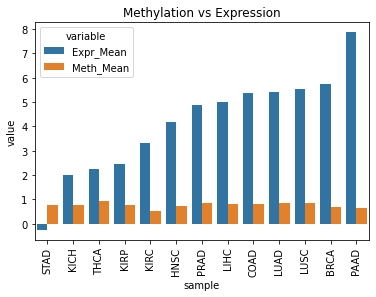

In [97]:
sns.barplot(x='sample', y='value', hue='variable', data=meg)
plt.xticks(rotation=90)
plt.title('Methylation vs Expression');

In [ ]:
sns.color_palette("tab10")

ax = sns.boxplot(x="sample", y="value",hue='variable',
                 data=df1, palette="tab10")
plt.xticks(rotation=70)

In [63]:
# overall correlation coefficent of lncRNAs accross multiple cancers

In [102]:
df1_coe.head()

,Gene,sample,variable,value
1107,C12orf77,KICH,Corr_Coeff,-0.832000
228,PVT1,PAAD,Corr_Coeff,-0.777375
1362,C15orf56,HNSC,Corr_Coeff,-0.771492
984,PVT1,KIRP,Corr_Coeff,-0.768842
229,SNHG12,PAAD,Corr_Coeff,-0.752905


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'KICH'),
  Text(1, 0, 'PAAD'),
  Text(2, 0, 'HNSC'),
  Text(3, 0, 'KIRP'),
  Text(4, 0, 'LIHC'),
  Text(5, 0, 'PRAD'),
  Text(6, 0, 'COAD'),
  Text(7, 0, 'LUSC'),
  Text(8, 0, 'BRCA'),
  Text(9, 0, 'KIRC'),
  Text(10, 0, 'THCA'),
  Text(11, 0, 'STAD'),
  Text(12, 0, 'LUAD')])

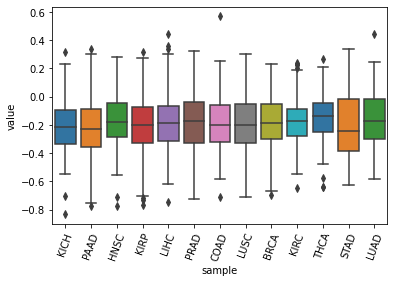

In [103]:
sns.color_palette("tab10")

ax = sns.boxplot(x="sample", y="value",
                 data=df1_coe, palette="tab10")
plt.xticks(rotation=70)